# MIDSEM Exam
# Soham Maji
# Roll - 2011162
P452, Date-22/02/2024

Used functions are called from librarry and also attached with each solutions for direct reference

In [27]:
import sys
sys.path.append('../')
from library import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
matplotlib.style.use('fivethirtyeight')

Question. 1

In [2]:
def check_bracket(func, a, b, alpha):
    if func(a)*func(b) > 0:
        i = 0
        while func(a)*func(b) > 0:
            if func(a)<func(b):
                a = a - alpha*abs(b-a)
            else:
                b = b + alpha*abs(b-a)
            i = i+1
            
    return a, b

# Regula-falsi method
def regula_falsi(func, a_0, b_0, precision):
    
    I = []
    val = []
    
    i = 0
    if a_0 > b_0:
        print('left element of the interval cannot be greater than right element')
        return False
    if func(a_0)*func(b_0) > 0:
        a_0, b_0 = check_bracket(func, a_0, b_0, 1)

    c = b_0 - ((b_0-a_0)*func(b_0))/(func(b_0)-func(a_0))
    c_0 = 0
    while abs(func(c))>precision:
        
        i = i+1
        I.append(i)
        c = b_0-((b_0-a_0)*func(b_0))/(func(b_0)-func(a_0))
        val.append(c)
        if  func(a_0)*func(c)<0:
            b_0 = c
        elif func(b_0)*func(c)<0:
            a_0 = c
            
    return c, i, val, I


# Newton-Raphson method
def newton_raphson(func, dfunc, x_guess, precision):
    x = x_guess - (func(x_guess)/dfunc(x_guess))
    i = 0
    counter = 0
    while abs(x-x_guess) > precision:
        i += 1
        x_guess = x
        x = x_guess - func(x_guess)/dfunc(x_guess)
        counter = counter+1
        if counter == 40000:
            print("Warning:Iter Limit reached not converged")
            break
    return x, i

In [3]:
# define the fUnction to be solved
def f_q1(x):
    return np.log(x/2) - np.sin(5*x/2)

def df_q1(x):
    return (1/x) - (5/2)*(np.cos(5*x/2)) 
    
Initial_guess = [1.5, 2.5]
prec = 1e-6


In [55]:
# Using Regula-Falsi method:
sol1, i1, val, I = regula_falsi(f_q1, 1.5, 2.5, prec)
sol2, i2 = newton_raphson(f_q1, df_q1, 2.2, prec)
print(f'The solution using regula-falsi {sol1:.4f} within iteration value of {i1}')
print(f'The solution using newton raphson {sol2:.4f} within iteration value of {i2}')

The solution using regula-falsi 2.6231 within iteration value of 7
The solution using newton raphson 2.6231 within iteration value of 4


Q.2

In [6]:
# The steps and algorithm to solve using RK shooting method is given below
# runge kutta shooting method
def RK_shooting(Func_d2ydx2, func_dydx, x0, y0, z0, xf, h):                         
    x = [x0]
    y = [y0]
    z = [z0]
    N = int((xf-x0)/h)
    for i in range(N):        
        k1 = h * func_dydx(x[i], y[i], z[i])
        l1 = h * Func_d2ydx2(x[i], y[i], z[i])
        
        k2 = h * func_dydx(x[i] + h/2, y[i] + k1/2, z[i] + l1/2)
        l2 = h * Func_d2ydx2(x[i] + h/2, y[i] + k1/2, z[i] + l1/2)
        
        k3 = h * func_dydx(x[i] + h/2, y[i] + k2/2, z[i] + l2/2)
        l3 = h * Func_d2ydx2(x[i] + h/2, y[i] + k2/2, z[i] + l2/2)
        
        k4 = h * func_dydx(x[i] + h, y[i] + k3, z[i] + l3)
        l4 = h * Func_d2ydx2(x[i] + h, y[i] + k3, z[i] + l3)
        
        x.append(x[i] + h)
        y.append(y[i] + (k1 + 2*k2 + 2*k3 + k4)/6)
        z.append(z[i] + (l1 + 2*l2 + 2*l3 + l4)/6)
    return x, y, z

def Lagrange_interpol(zeta_h, zeta_l, yh, yl, y):                                            # Lagrange interpolation
    zeta = zeta_l + (zeta_h - zeta_l) * (y - yl)/(yh - yl)
    return zeta

def RKshooting_method_solve(Func_d2ydx2, func_dydx, x0, y0, xf, yf, z1, z2, h, tol=1e-6):                 #Shooting method
    x, y, z = RK_shooting(Func_d2ydx2, func_dydx, x0, y0, z1, xf, h)
    yn = y[-1]
    if abs(yn - yf) > tol:
        if yn < yf:
            zeta_l = z1
            yl = yn
            x, y, z = RK_shooting(Func_d2ydx2, func_dydx, x0, y0, z2, xf, h)
            yn = y[-1]
            if yn > yf:
                zeta_h = z2
                yh = yn
                zeta = Lagrange_interpol(zeta_h, zeta_l, yh, yl, yf)
                x, y, z = RK_shooting(Func_d2ydx2, func_dydx, x0, y0, zeta, xf, h)
                return x, y
            else:
                print("Invalid bracketing.")
        elif yn > yf:
            zeta_h = z1
            yh = yn
            x, y, z = RK_shooting(Func_d2ydx2, func_dydx, x0, y0, z2, xf, h)
            yn = y[-1]
            if yn < yf:
                zeta_l = z2
                yl = yn
                zeta = Lagrange_interpol(zeta_h, zeta_l, yh, yl, yf)
                x, y, z = RK_shooting(Func_d2ydx2, func_dydx, x0, y0, zeta, xf, h)
                return x, y
            else:
                print("Invalid bracketig.")
    else:
        return x, y

The value of x in length of the rod where the temperature is 100 degree is = 4.5 m


Text(0, 0.5, 'temperature (degree celsius)')

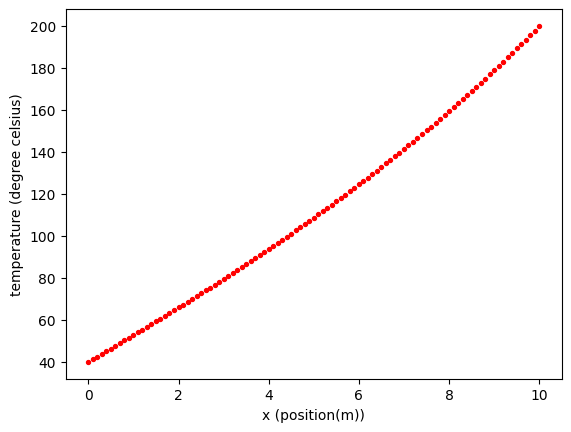

In [7]:
# defining the 1st and second derivative
def dtdx_2(x, t, z):
    return -0.01*(20-t)

def dtdx(x, t, z):
    return z

# the constraints and constants values
x = 0 # start position of the rod
T = 40 # Temperature at x=0 
x_f = 10
T_f = 200
h = 0.1
tolerance = 1e-3

# solving
X_, T_ = RKshooting_method_solve(dtdx_2, dtdx, x, T, x_f, T_f, 10, 100, h, tolerance)
for i in range(len(T_)):
    if T_[i] >= 100:
        post = i
        break     
print("The value of x in length of the rod where the temperature is 100 degree is =", X_[post], 'm')

#plot
plt.scatter(X_, T_, color='red', s=8)
plt.xlabel('x (position(m))')
plt.ylabel('temperature (degree celsius)')

Q.3

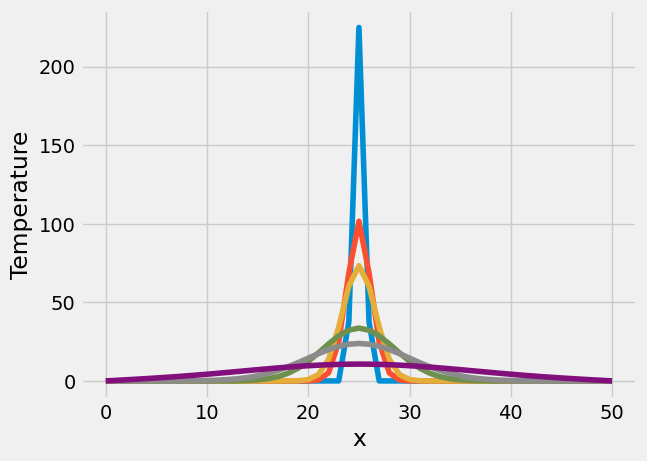

In [36]:
def heat_equation(T,l_x, n_x, l_t, n_t):
    hx =l_x/n_x
    ht = l_t/n_t
    alpha = ht/(hx**2)
    H0 = [0 for i in range(n_x+1)]
    H1 = [0 for i in range(n_x+1)]
    a = []

    if alpha < 0.5:
        for i in range(n_x+1):
            H0[i] = (T(n_x, i))
            a.append(i)

    for j in range(0, 1000):
        for i in range(1, n_x):
            if i == 0:
                H1[i] = (1 - 2*alpha)*H0[i] + alpha*H0[i+1]
            elif i == n_x:
                H1[i] = alpha*H0[i-1] + (1 - 2*alpha)*H0[i]

            else:

                H1[i] = alpha*H0[i-1] + (1 - 2*alpha)*H0[i] + alpha*H0[i+1]

        for i in range(1, n_x):

            H0[i] = H1[i]

        if j == 0  or j == 5 or j == 10 or j == 50 or j == 100 or j == 500 or j == 1000:

            plt.plot(a, H0)

    plt.xlabel('x')
    plt.ylabel('Temperature')
    plt.show()

# define the function for temperature
def T_func(n_x, i):
    if i == n_x/2:
        T = 300
    else:
        T = 0
    return T

# solving and plotting the solution
heat_equation(T_func, 2, 50, 20, 100000)


Q.4

In [9]:
# Given linear mass density of the beam:
def Lambda(x):
    return x**2

# Total length of the beam
L = 2 # in meters

# define the numerator integral:
def xLambda(x):
    return x * x**2



In [10]:
# Using gaussian quadrature method
# Calculate the numerator and denominator integral using gaussian quad method:
num_sol_ = gaussian_quad(xLambda, 0, L)
denom_sol_ = gaussian_quad(Lambda, 0, L)

x_pos = num_sol_/denom_sol_
print(f'The position of center of mass calculated using gaussian quadrature method = {x_pos:.4f} m')

The position of center of mass calculated using gaussian quadrature method = 1.5000 m


Q.5

In [49]:
# Load the coefficient matrix data
Coeff = np.array(load_matrix('MidSemMatrixCoeffData.txt'))
# constant matrix
Const = [19, 2, 13, -7, -9, 2]

In [48]:
matrix_sol = LU_decom_solve(Coeff, Const)
print('The solution array is given as:')
a = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6']
for i in range(len(a)):
    print(f'{a[i]} = {matrix_sol[i]:.4f}')
    

The solution array is given as:
a1 = -1.7618
a2 = 0.8962
a3 = 4.0519
a4 = -1.6171
a5 = 2.0419
a6 = 0.1518
